In [1]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as gb
import plotly.express as ex
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import xlrd
import warnings
warnings.filterwarnings("ignore")

FASE 1
----

In [2]:
filepath = '/content/sample_data/Emissioni 10.000 ab.xls'

In [5]:
df = pd.read_excel(filepath)
df1 = df.copy()

In [ ]:
df1.head()

In [7]:
#estrae header e dati
header = df1.iloc[1]
data_df = df1[3:63]
data_df.columns = header

data_df.reset_index(drop=True, inplace = True)
data_df.head()

1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
0,Automobili,benzina verde,Euro 0,< 01/01/93,61.632435,1.204133,2084.048393,1620.773665,122.076129,12362.960114,190.028009,8.179762,1.999326,15.565311,27.0227,40.058423
1,Automobili,benzina verde,Euro 1 - 91/441/EEC,da 01/01/1993 a 31/12/1996,59.253481,1.140755,711.703829,588.338866,25.705812,5830.90428,182.673617,15.460622,102.897094,15.733231,27.190619,40.226342
2,Automobili,benzina verde,Euro 2 - 94/12/EC,da 01/01/1997 a 31/12/2000,56.54658,1.125293,358.630231,157.147263,35.396946,2068.050436,174.355865,7.945214,148.842319,15.732021,27.189409,40.225132
3,Automobili,benzina verde,Euro 3 - 98/69/EC Stage 2000,da 01/01/2001 a 31/12/2005,57.539716,1.147106,79.716127,15.488732,24.151833,1131.241819,177.412878,2.582156,23.055528,14.404072,25.86146,38.897183
4,Automobili,benzina verde,Euro 4 - 98/69/EC Stage 2005,da 01/01/2006 a 31/12/2010,59.429358,1.187123,50.254159,10.406638,17.541094,362.63487,182.827675,1.945418,23.549106,14.400368,25.857756,38.893479


In [ ]:
data_df.isna().sum()

In [ ]:
data_df.dropna(inplace = True)
data_df.isna().sum()

<Axes: xlabel='Settore', ylabel='Consumo specifico'>

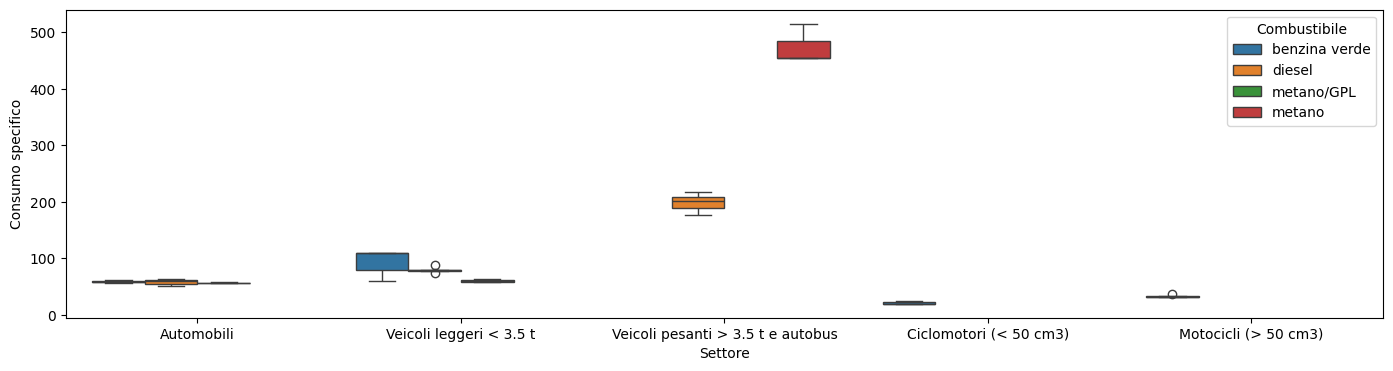

In [15]:
plt.figure(figsize=(17, 4))
sns.boxplot(x='Settore', y='Consumo specifico', hue='Combustibile', data=data_df)

In [66]:
data_df.columns

Index(['Settore', 'Combustibile', 'Tipo legislativo', 'Periodo',
       'Consumo specifico', 'SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O',
       'NH3', 'PM2.5', 'PM10', 'PTS'],
      dtype='object', name=1)

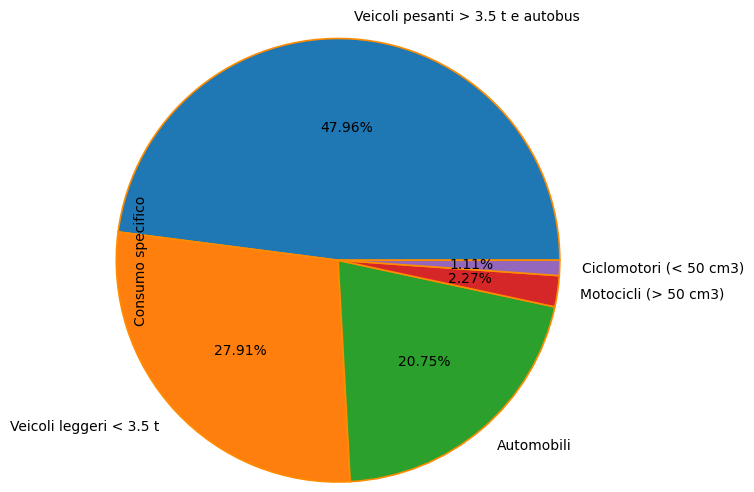

<Figure size 400x400 with 0 Axes>

In [60]:
df2 = data_df.copy()

df2.groupby(by = df2["Settore"])["Consumo specifico"].sum().sort_values(
ascending=False)[:5].plot(kind="pie",
                                  autopct="%1.2f%%",radius = 1.5,
                                  wedgeprops={'linewidth':1.2,
                                             'edgecolor':'darkorange'})
plt.figure(figsize=(4, 4))
plt.show()

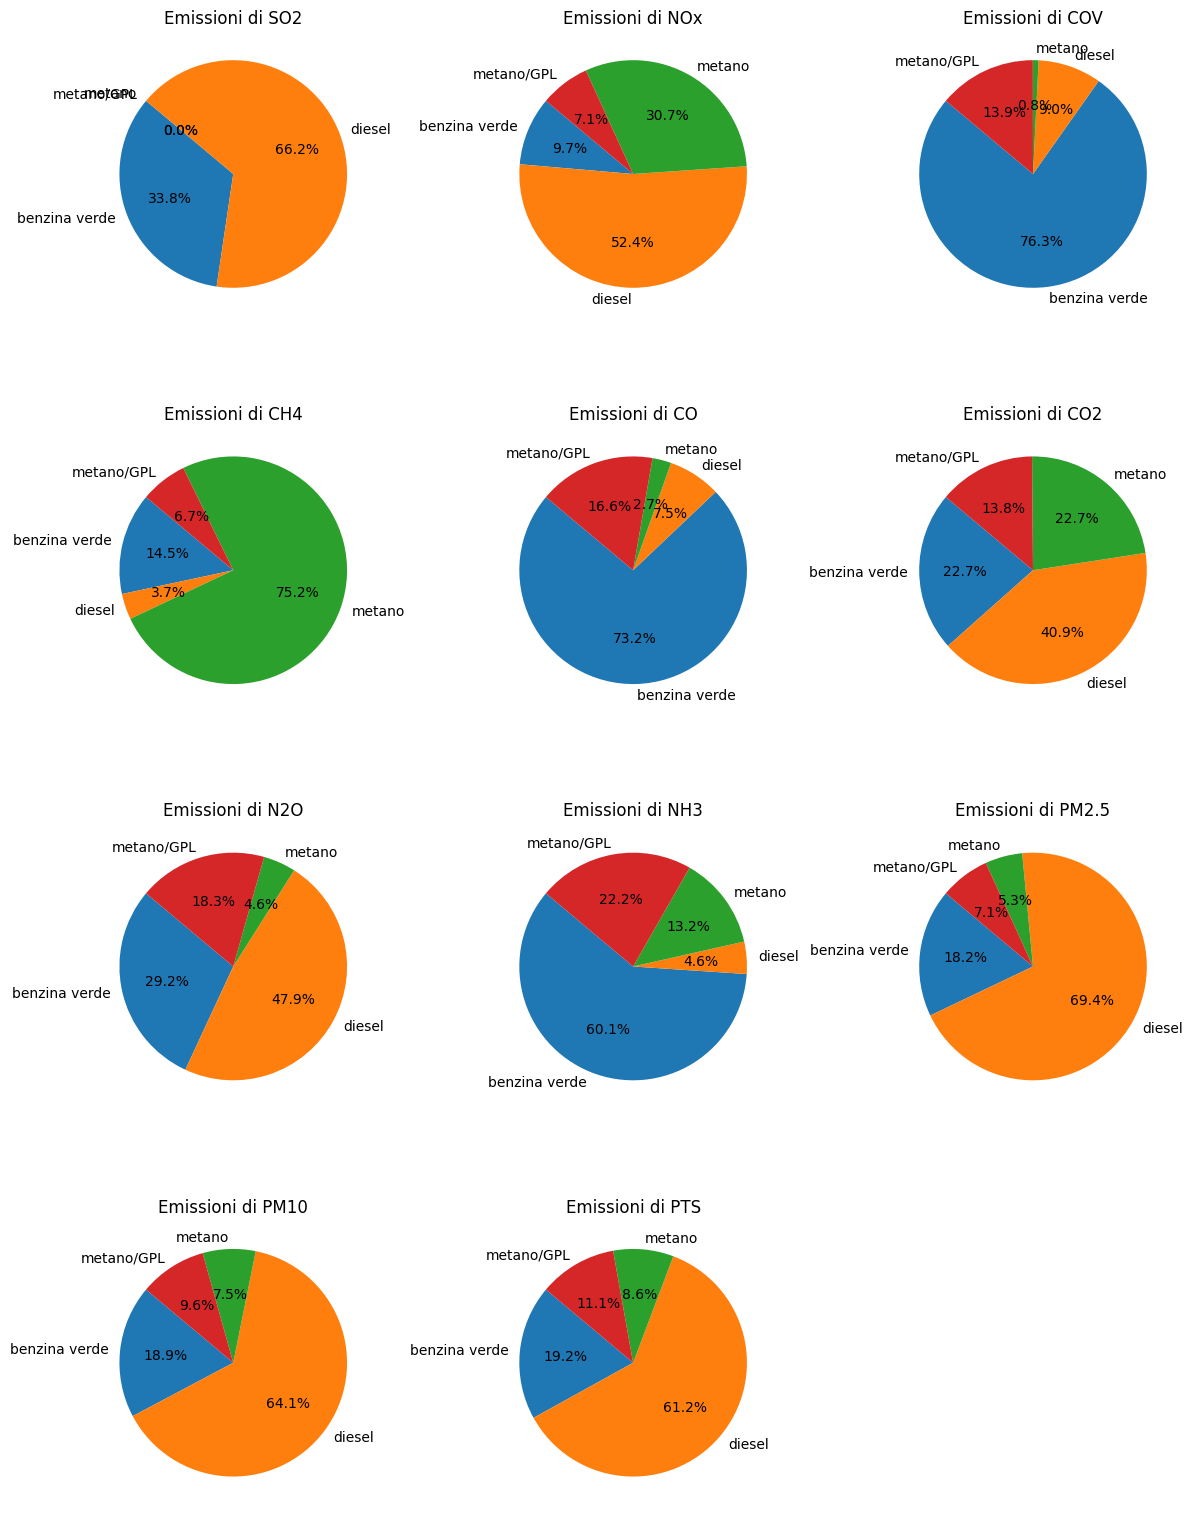

In [74]:
# Elenca tutti gli inquinanti
inquinanti = ['SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10', 'PTS']

# Calcola il numero di righe e colonne per i subplot
n = len(inquinanti)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

# Crea il grafico a torta per ogni inquinante
for ax, inquinante in zip(np.ravel(axs), inquinanti):
    # Calcola la somma totale dell'inquinante per ogni tipo di combustibile
    somme_combustibili = df2.groupby('Combustibile')[inquinante].sum()

    ax.pie(somme_combustibili, labels=somme_combustibili.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Emissioni di {inquinante}')

# Rimuovi gli assi vuoti
for ax in np.ravel(axs)[len(inquinanti):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()